In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [18]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models'

CH = 23
train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [19]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [20]:
len(train_loader), len(val_loader), len(test_loader)

(50, 7, 16)

In [21]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 15])
torch.Size([256, 1])
256
256
256


date:180325, rec:005, time:3188.0


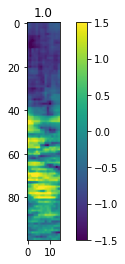

date:180324, rec:001, time:1323.0


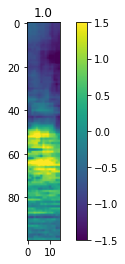

date:180323, rec:004, time:4171.0


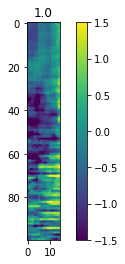

date:180322, rec:005, time:6681.0


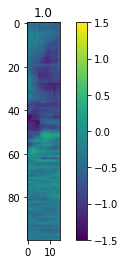

date:180325, rec:009, time:6527.0


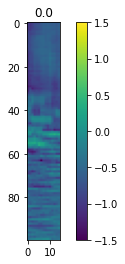

date:180324, rec:001, time:1684.0


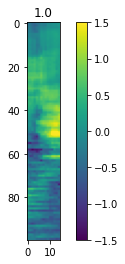

date:180324, rec:008, time:2440.0


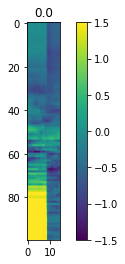

date:180325, rec:007, time:2923.0


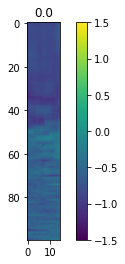

date:180324, rec:009, time:1255.0


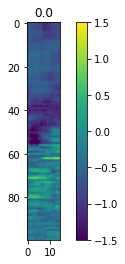

date:180325, rec:009, time:1947.0


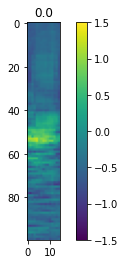

date:180325, rec:006, time:4917.0


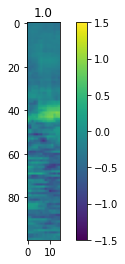

date:180322, rec:007, time:4427.0


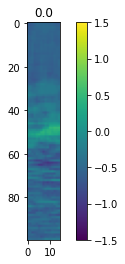

date:180325, rec:009, time:1347.0


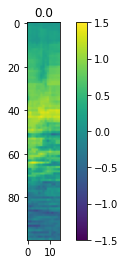

date:180325, rec:009, time:1047.0


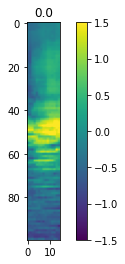

date:180324, rec:008, time:2695.0


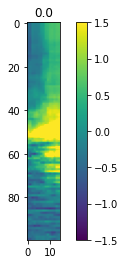

date:180401, rec:001, time:6305.0


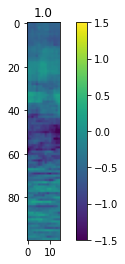

date:180322, rec:007, time:1469.0


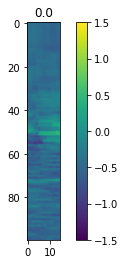

date:180325, rec:005, time:3480.0


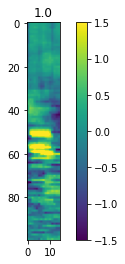

date:180324, rec:009, time:882.0


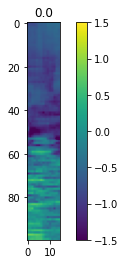

date:180323, rec:002, time:5032.0


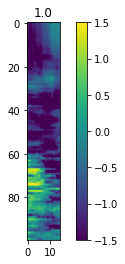

date:180325, rec:007, time:6275.0


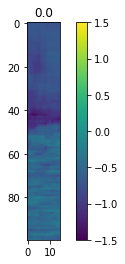

date:180325, rec:005, time:6350.0


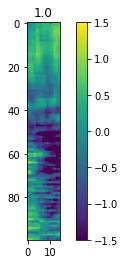

date:180401, rec:001, time:477.0


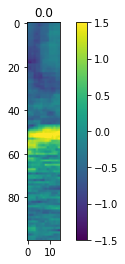

date:180325, rec:005, time:102.0


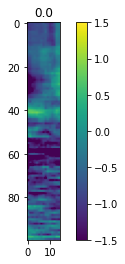

date:180325, rec:009, time:3558.0


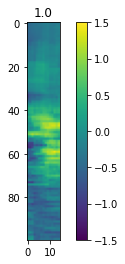

date:180324, rec:001, time:2957.0


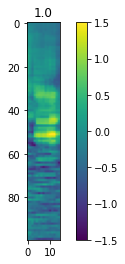

date:180324, rec:001, time:3632.0


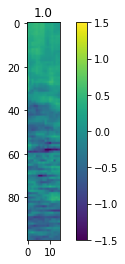

date:180322, rec:003, time:6518.0


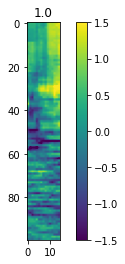

date:180325, rec:006, time:4782.0


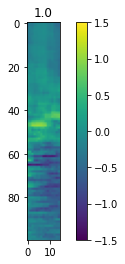

date:180325, rec:009, time:5901.0


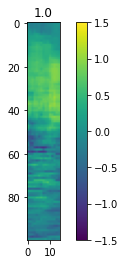

date:180325, rec:004, time:2235.0


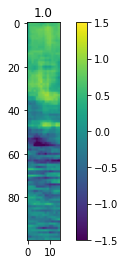

date:180325, rec:005, time:27.0


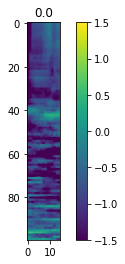

date:180401, rec:001, time:5149.0


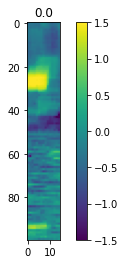

date:180324, rec:008, time:5596.0


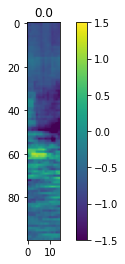

date:180401, rec:001, time:5284.0


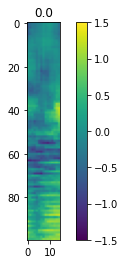

date:180325, rec:001, time:1137.0


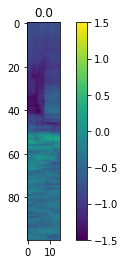

date:180322, rec:007, time:1514.0


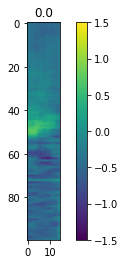

date:180401, rec:001, time:5780.0


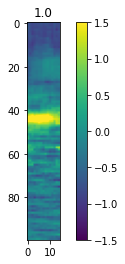

date:180323, rec:002, time:3861.0


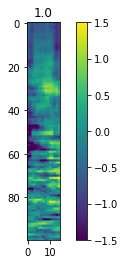

date:180322, rec:003, time:710.0


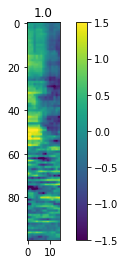

date:180322, rec:007, time:1499.0


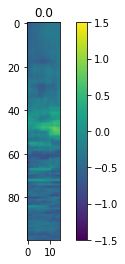

date:180322, rec:007, time:4427.0


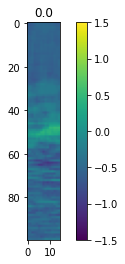

date:180324, rec:008, time:3415.0


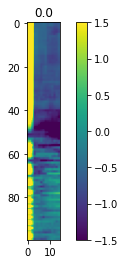

date:180325, rec:005, time:4188.0


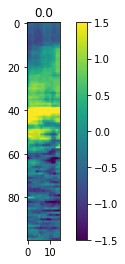

date:180325, rec:007, time:2818.0


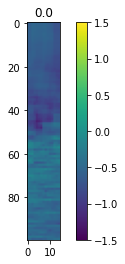

date:180401, rec:001, time:3290.0


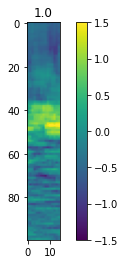

date:180322, rec:004, time:4821.0


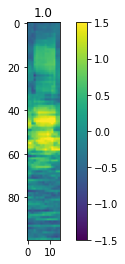

date:180325, rec:002, time:627.0


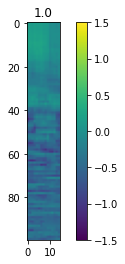

date:180324, rec:005, time:7072.0


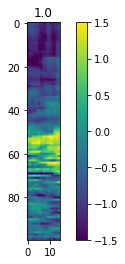

date:180322, rec:005, time:1897.0


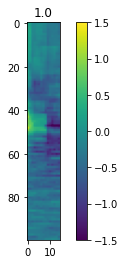

date:180401, rec:001, time:4338.0


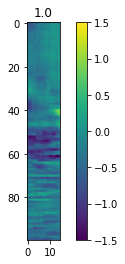

date:180322, rec:004, time:4266.0


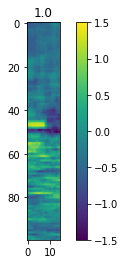

date:180324, rec:008, time:2830.0


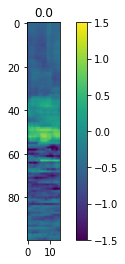

date:180325, rec:006, time:5767.0


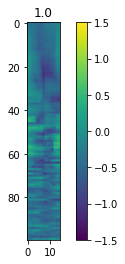

date:180322, rec:007, time:4592.0


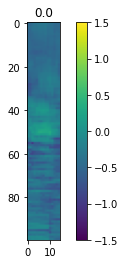

date:180325, rec:009, time:6527.0


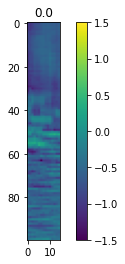

date:180325, rec:002, time:2214.0


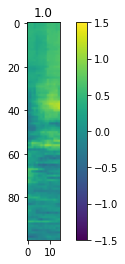

date:180325, rec:003, time:3519.0


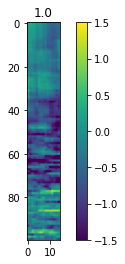

date:180322, rec:007, time:1799.0


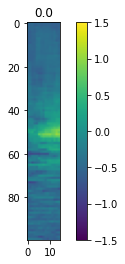

date:180325, rec:004, time:765.0


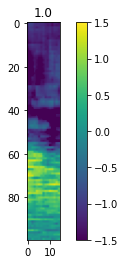

date:180325, rec:007, time:6260.0


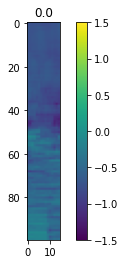

date:180323, rec:002, time:2858.0


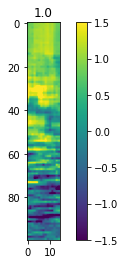

date:180325, rec:007, time:3103.0


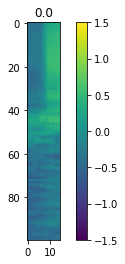

date:180325, rec:007, time:3238.0


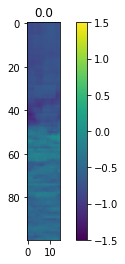

date:180325, rec:009, time:6512.0


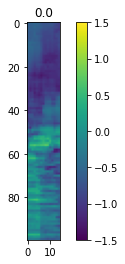

date:180325, rec:009, time:6512.0


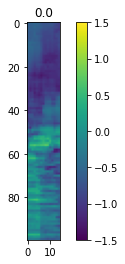

date:180324, rec:008, time:5266.0


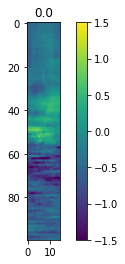

date:180325, rec:005, time:2016.0


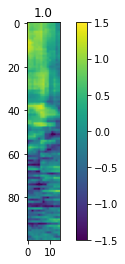

date:180324, rec:004, time:6689.0


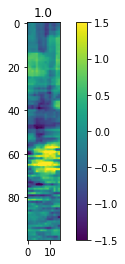

date:180325, rec:009, time:2067.0


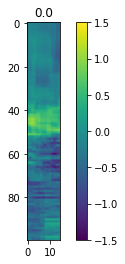

date:180323, rec:004, time:4441.0


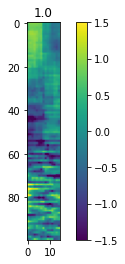

date:180325, rec:009, time:3768.0


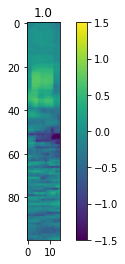

date:180401, rec:001, time:5434.0


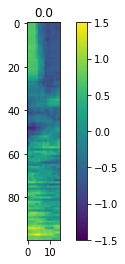

date:180325, rec:003, time:5834.0


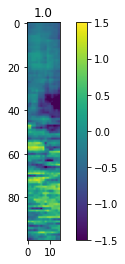

date:180401, rec:001, time:777.0


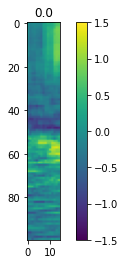

date:180324, rec:004, time:6960.0


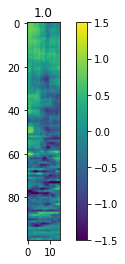

date:180401, rec:001, time:522.0


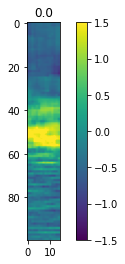

date:180401, rec:001, time:267.0


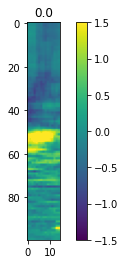

date:180322, rec:003, time:6788.0


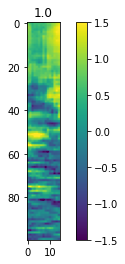

date:180401, rec:001, time:1137.0


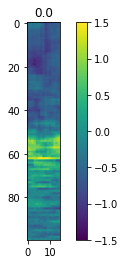

date:180324, rec:009, time:567.0


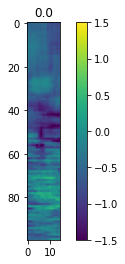

date:180325, rec:002, time:5285.0


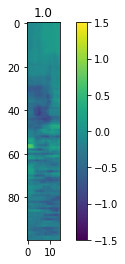

date:180322, rec:007, time:1544.0


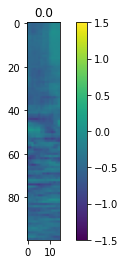

date:180324, rec:009, time:732.0


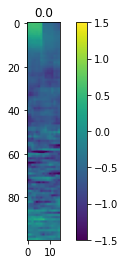

date:180325, rec:001, time:3342.0


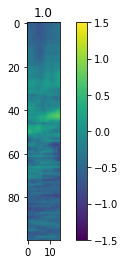

date:180323, rec:002, time:5437.0


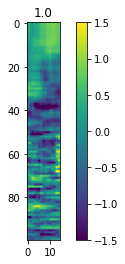

date:180324, rec:003, time:5345.0


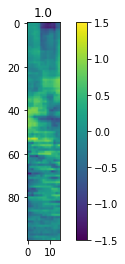

date:180324, rec:008, time:1843.0


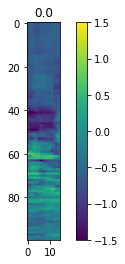

date:180325, rec:007, time:6515.0


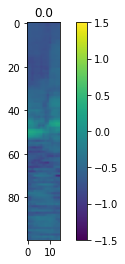

date:180323, rec:003, time:4998.0


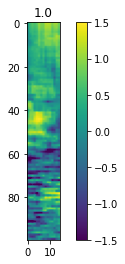

date:180325, rec:007, time:2818.0


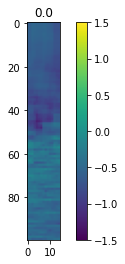

date:180401, rec:002, time:2533.0


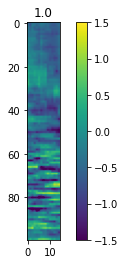

date:180325, rec:009, time:4796.0


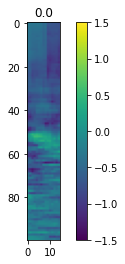

date:180324, rec:009, time:882.0


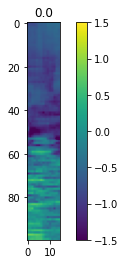

date:180325, rec:001, time:1782.0


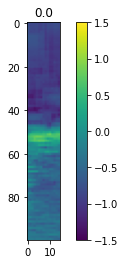

date:180324, rec:004, time:4506.0


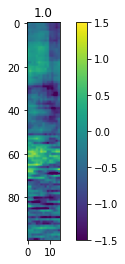

date:180325, rec:006, time:826.0


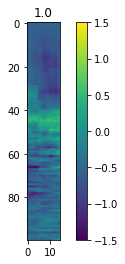

date:180325, rec:007, time:2878.0


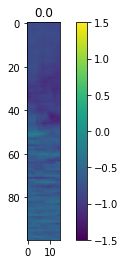

date:180325, rec:001, time:1617.0


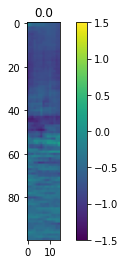

date:180401, rec:001, time:5359.0


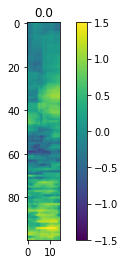

date:180325, rec:004, time:5233.0


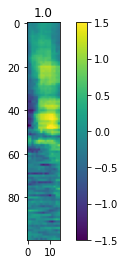

date:180324, rec:009, time:1089.0


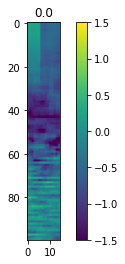

date:180324, rec:004, time:5256.0


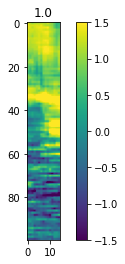

date:180324, rec:008, time:3775.0


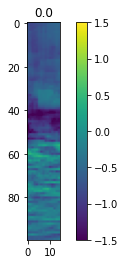

date:180324, rec:009, time:732.0


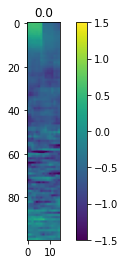

date:180324, rec:003, time:2031.0


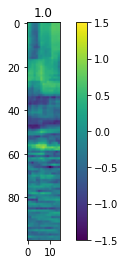

date:180323, rec:004, time:4546.0


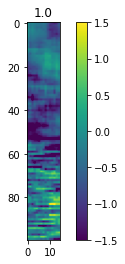

date:180325, rec:007, time:3088.0


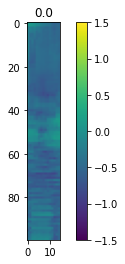

date:180325, rec:005, time:3525.0


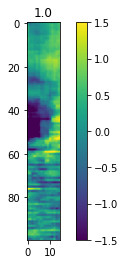

date:180324, rec:004, time:1926.0


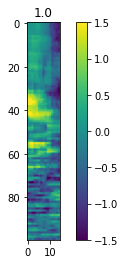

date:180324, rec:008, time:6796.0


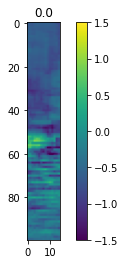

date:180325, rec:009, time:5188.0


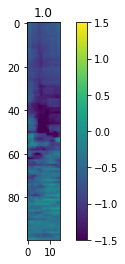

date:180401, rec:001, time:5179.0


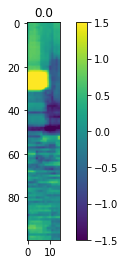

date:180324, rec:005, time:2327.0


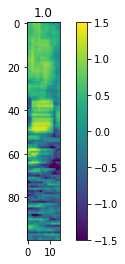

date:180401, rec:001, time:4759.0


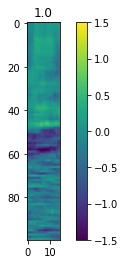

date:180324, rec:008, time:2023.0


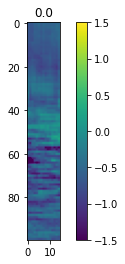

date:180325, rec:001, time:2848.0


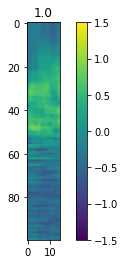

date:180325, rec:002, time:5480.0


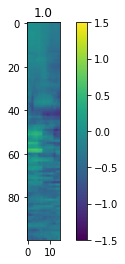

date:180324, rec:003, time:1476.0


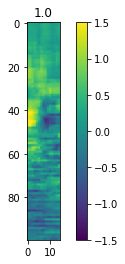

date:180325, rec:001, time:2352.0


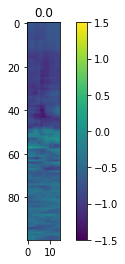

date:180322, rec:004, time:3775.0


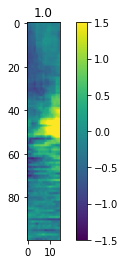

date:180322, rec:002, time:6393.0


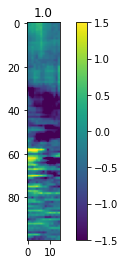

date:180324, rec:008, time:6091.0


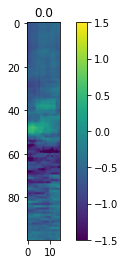

date:180401, rec:002, time:6898.0


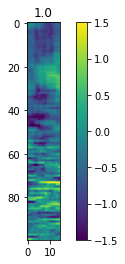

date:180322, rec:003, time:2890.0


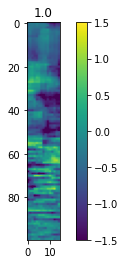

date:180324, rec:008, time:5761.0


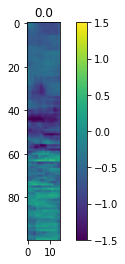

date:180323, rec:004, time:5356.0


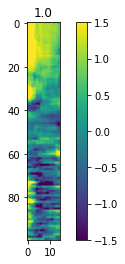

date:180325, rec:006, time:5190.0


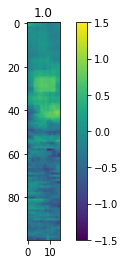

In [8]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [0]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 15



Train loss for epoch 0: 0.5284956097602844
Val loss for epoch 0: 0.4852375388145447
Train loss for epoch 1: 0.4942125678062439
Val loss for epoch 1: 0.48364976048469543
1
Train loss for epoch 2: 0.4833681285381317
Val loss for epoch 2: 0.4680905342102051
2
Train loss for epoch 3: 0.47912201285362244
Val loss for epoch 3: 0.48905912041664124
Train loss for epoch 4: 0.47001707553863525
Val loss for epoch 4: 0.470757395029068
Train loss for epoch 5: 0.46589210629463196
Val loss for epoch 5: 0.4917316436767578
Train loss for epoch 6: 0.45835888385772705
Val loss for epoch 6: 0.4730311334133148
Train loss for epoch 7: 0.45313552021980286
Val loss for epoch 7: 0.46203744411468506
7
Train loss for epoch 8: 0.4506424069404602
Val loss for epoch 8: 0.48603805899620056
Train loss for epoch 9: 0.44804662466049194
Val loss for epoch 9: 0.47270143032073975
Train loss for epoch 10: 0.44533011317253113
Val loss for epoch 10: 0.47508543729782104
Train loss for epoch 11: 0.44015422463417053
Val loss fo

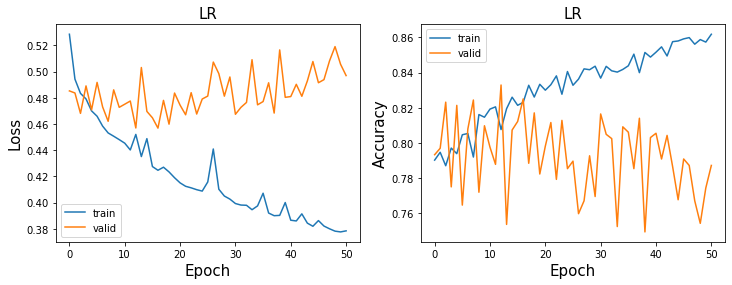

In [12]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0         16


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone0_EPOCH16_valbalanced.pt


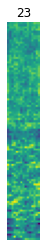

validation loss:0.46253663301467896 accuracy:0.8152439024390243
0.5
date:180327, rec:004, time:4816.0, label:1.0
Original data 62 CH


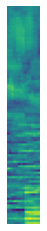

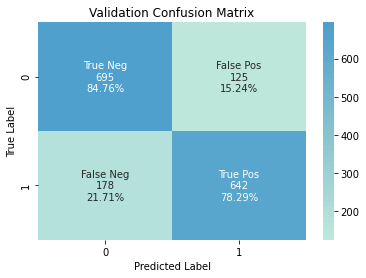

In [26]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [27]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100] 
model_type = 'LR'
loss_type = 'bce'

reg_type = 'l2'
timewindow = 15



Train loss for epoch 0: 0.5417309403419495
Val loss for epoch 0: 0.483271986246109
Train loss for epoch 1: 0.49400025606155396
Val loss for epoch 1: 0.47215884923934937
1
Train loss for epoch 2: 0.4830116629600525
Val loss for epoch 2: 0.46888506412506104
2
Train loss for epoch 3: 0.4815343916416168
Val loss for epoch 3: 0.4898798167705536
Train loss for epoch 4: 0.4706403911113739
Val loss for epoch 4: 0.48897311091423035
Train loss for epoch 5: 0.4752844572067261
Val loss for epoch 5: 0.47021546959877014
Train loss for epoch 6: 0.4656640589237213
Val loss for epoch 6: 0.4721560478210449
Train loss for epoch 7: 0.46190550923347473
Val loss for epoch 7: 0.4720882773399353
Train loss for epoch 8: 0.463595986366272
Val loss for epoch 8: 0.46186983585357666
8
Train loss for epoch 9: 0.4590419828891754
Val loss for epoch 9: 0.465699702501297
Train loss for epoch 10: 0.45006534457206726
Val loss for epoch 10: 0.4658581018447876
Train loss for epoch 11: 0.4462031126022339
Val loss for epoch 

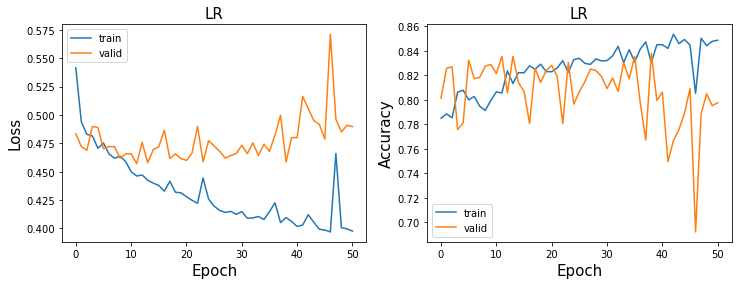

Train loss for epoch 0: 0.6431406736373901
Val loss for epoch 0: 0.5796533226966858
Train loss for epoch 1: 0.5685391426086426
Val loss for epoch 1: 0.530663251876831
1
Train loss for epoch 2: 0.5642560720443726
Val loss for epoch 2: 0.5248498320579529
2
Train loss for epoch 3: 0.5702912211418152
Val loss for epoch 3: 0.5274062156677246
Train loss for epoch 4: 0.5778490900993347
Val loss for epoch 4: 0.5246788859367371
4
Train loss for epoch 5: 0.5703427195549011
Val loss for epoch 5: 0.5201847553253174
5
Train loss for epoch 6: 0.5745753049850464
Val loss for epoch 6: 0.5169851183891296
6
Train loss for epoch 7: 0.5652286410331726
Val loss for epoch 7: 0.5253570079803467
Train loss for epoch 8: 0.5856432318687439
Val loss for epoch 8: 0.5132800936698914
8
Train loss for epoch 9: 0.5712836384773254
Val loss for epoch 9: 0.5240512490272522
Train loss for epoch 10: 0.5981625914573669
Val loss for epoch 10: 0.5357297658920288
Train loss for epoch 11: 0.5818966627120972
Val loss for epoch 

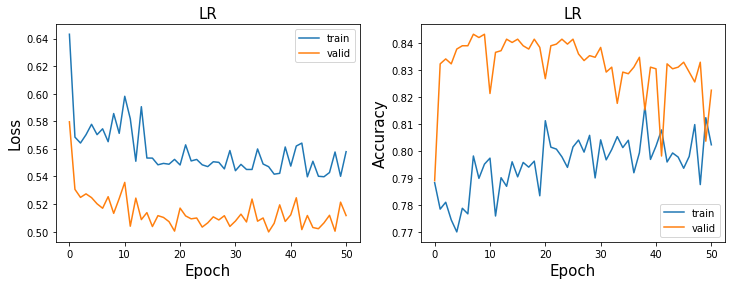

Train loss for epoch 0: 0.7104843258857727
Val loss for epoch 0: 0.5753759145736694
Train loss for epoch 1: 0.5969836711883545
Val loss for epoch 1: 0.558091938495636
1
Train loss for epoch 2: 0.6259114742279053
Val loss for epoch 2: 0.5598801970481873
Train loss for epoch 3: 0.6339871287345886
Val loss for epoch 3: 0.5606639385223389
Train loss for epoch 4: 0.6255568861961365
Val loss for epoch 4: 0.5675399303436279
Train loss for epoch 5: 0.6458813548088074
Val loss for epoch 5: 0.5532003045082092
5
Train loss for epoch 6: 0.6160983443260193
Val loss for epoch 6: 0.5502350330352783
6
Train loss for epoch 7: 0.6135277152061462
Val loss for epoch 7: 0.5513927340507507
Train loss for epoch 8: 0.613101065158844
Val loss for epoch 8: 0.5501233339309692
8
Train loss for epoch 9: 0.6121699213981628
Val loss for epoch 9: 0.5544084310531616
Train loss for epoch 10: 0.6274596452713013
Val loss for epoch 10: 0.5526778697967529
Train loss for epoch 11: 0.6114169955253601
Val loss for epoch 11: 0

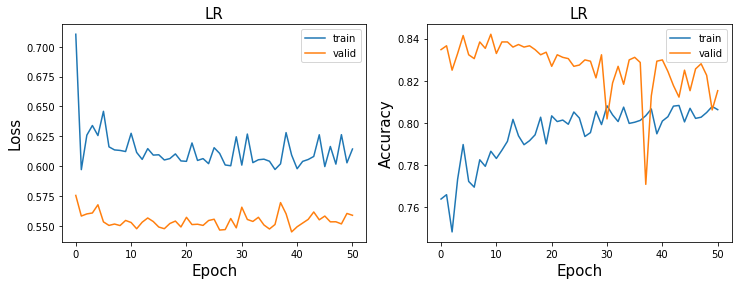

In [14]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break           
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [28]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         11
50        36
100       39


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH11_valbalanced.pt


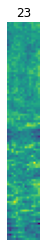

validation loss:0.46132320165634155 accuracy:0.8280487804878048
0.5
date:180327, rec:004, time:4816.0, label:1.0
Original data 62 CH


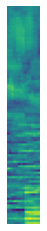

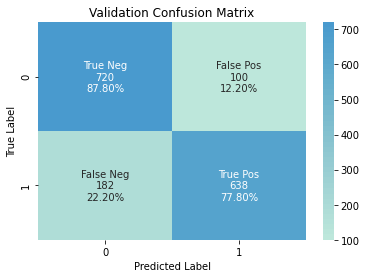

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH36_valbalanced.pt


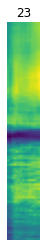

validation loss:0.5001475811004639 accuracy:0.8353658536585366
0.5
date:180329, rec:006, time:3686.0, label:1.0
Original data 62 CH


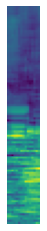

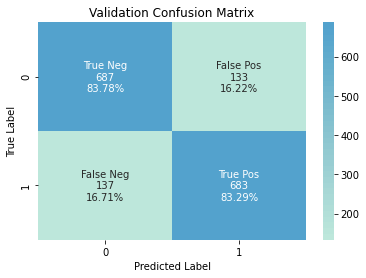

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH39_valbalanced.pt


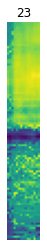

validation loss:0.5452202558517456 accuracy:0.8329268292682926
0.5
date:180329, rec:006, time:3686.0, label:1.0
Original data 62 CH


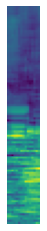

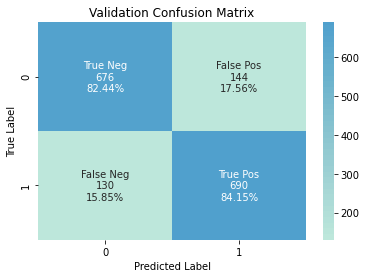

In [29]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [30]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 15

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.5321491956710815
Val loss for epoch 0: 0.4833597242832184
Train loss for epoch 1: 0.49472567439079285
Val loss for epoch 1: 0.4807027280330658
1
Train loss for epoch 2: 0.4853155016899109
Val loss for epoch 2: 0.47656476497650146
2
Train loss for epoch 3: 0.47908803820610046
Val loss for epoch 3: 0.5160171389579773
Train loss for epoch 4: 0.4763262867927551
Val loss for epoch 4: 0.46834373474121094
4
Train loss for epoch 5: 0.4761907458305359
Val loss for epoch 5: 0.4864354431629181
Train loss for epoch 6: 0.46514102816581726
Val loss for epoch 6: 0.48784467577934265
Train loss for epoch 7: 0.4730251133441925
Val loss for epoch 7: 0.4634282886981964
7
Train loss for epoch 8: 0.4611581563949585
Val loss for epoch 8: 0.4610089957714081
8
Train loss for epoch 9: 0.45844924449920654
Val loss for epoch 9: 0.5220149159431458
Train loss for epoch 10: 0.48086246848106384
Val loss for epoch 10: 0.4752526879310608
Train loss for epoch 11: 0.44901466369628906
Val loss fo

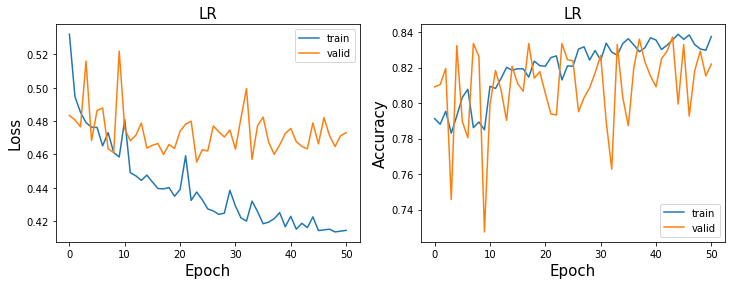

Train loss for epoch 0: 0.6573957204818726
Val loss for epoch 0: 0.502105176448822
Train loss for epoch 1: 0.5557237267494202
Val loss for epoch 1: 0.4981273412704468
1
Train loss for epoch 2: 0.5687119364738464
Val loss for epoch 2: 0.5149054527282715
Train loss for epoch 3: 0.5609094500541687
Val loss for epoch 3: 0.5071484446525574
Train loss for epoch 4: 0.5587686896324158
Val loss for epoch 4: 0.5095577836036682
Train loss for epoch 5: 0.5539536476135254
Val loss for epoch 5: 0.5255001783370972
Train loss for epoch 6: 0.5685552954673767
Val loss for epoch 6: 0.5093808174133301
Train loss for epoch 7: 0.5499351024627686
Val loss for epoch 7: 0.5046713352203369
Train loss for epoch 8: 0.5504515767097473
Val loss for epoch 8: 0.5046030879020691
Train loss for epoch 9: 0.5486733913421631
Val loss for epoch 9: 0.5052515268325806
Train loss for epoch 10: 0.5523516535758972
Val loss for epoch 10: 0.5057651400566101
Train loss for epoch 11: 0.5484384894371033
Val loss for epoch 11: 0.5064

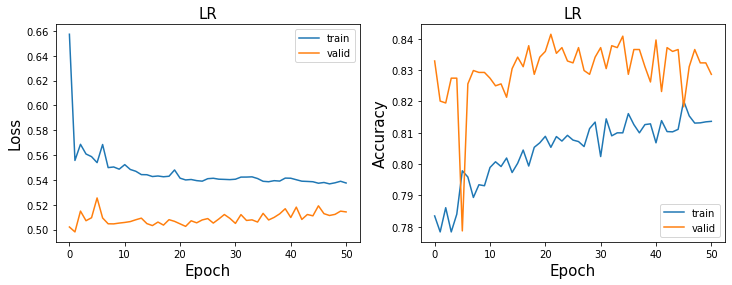

Train loss for epoch 0: 0.7734877467155457
Val loss for epoch 0: 0.5154179334640503
Train loss for epoch 1: 0.6197318434715271
Val loss for epoch 1: 0.5254425406455994
Train loss for epoch 2: 0.6267093420028687
Val loss for epoch 2: 0.5517321825027466
Train loss for epoch 3: 0.6090630292892456
Val loss for epoch 3: 0.5342690944671631
Train loss for epoch 4: 0.614658534526825
Val loss for epoch 4: 0.5425354242324829
Train loss for epoch 5: 0.6053305864334106
Val loss for epoch 5: 0.5388104915618896
Train loss for epoch 6: 0.6089261770248413
Val loss for epoch 6: 0.5462887287139893
Train loss for epoch 7: 0.6115692853927612
Val loss for epoch 7: 0.5427677035331726
Train loss for epoch 8: 0.6064048409461975
Val loss for epoch 8: 0.5406476855278015
Train loss for epoch 9: 0.6058744788169861
Val loss for epoch 9: 0.5411019325256348
Train loss for epoch 10: 0.605271577835083
Val loss for epoch 10: 0.5434470176696777
Train loss for epoch 11: 0.6116803884506226
Val loss for epoch 11: 0.5415439

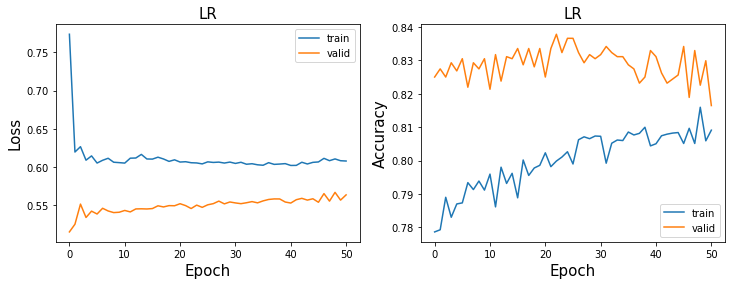

In [16]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break           
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [31]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         23
50         1
100        0


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH23_valbalanced.pt


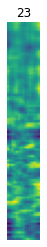

validation loss:0.4602646231651306 accuracy:0.8298780487804878
0.5
date:180327, rec:004, time:4816.0, label:1.0
Original data 62 CH


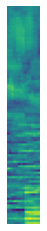

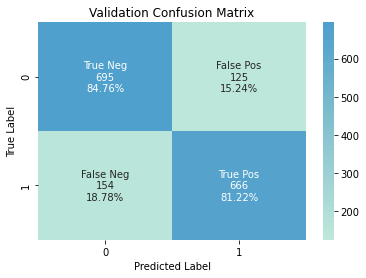

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH1_valbalanced.pt


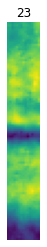

validation loss:0.4984583556652069 accuracy:0.8182926829268292
0.5
date:180327, rec:004, time:4816.0, label:1.0
Original data 62 CH


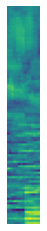

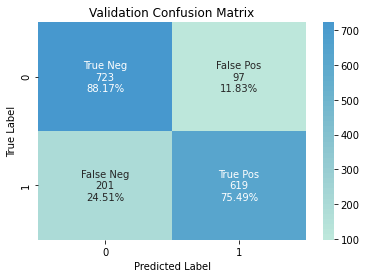

FileNotFoundError: [Errno 2] No such file or directory: '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH0_valbalanced.pt'

In [32]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

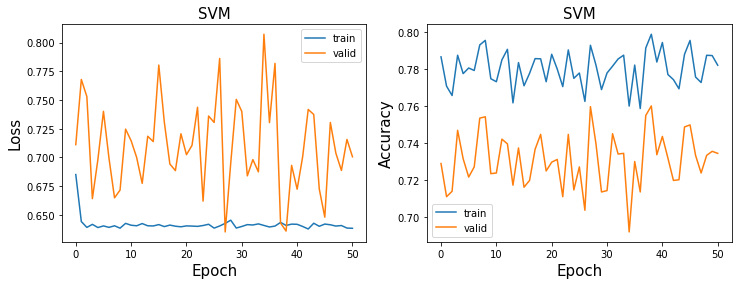

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

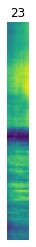

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


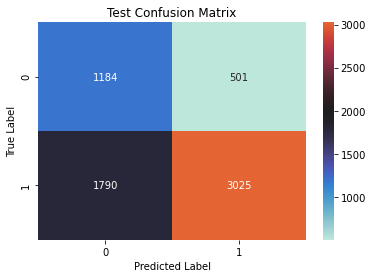

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


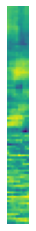

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

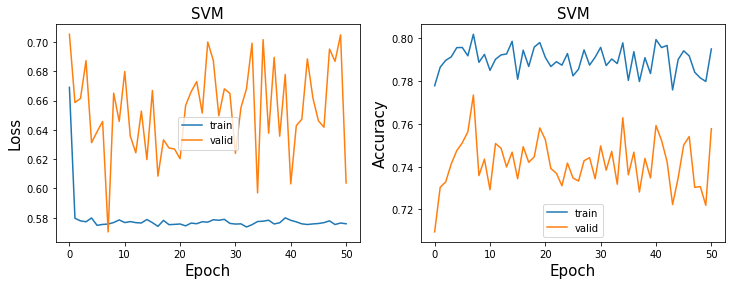

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

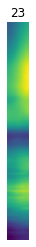

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


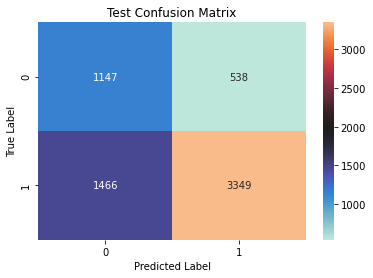

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


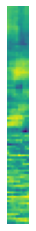

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()